Visualization, summer term 2024 \
\
Problem sheet 05

Submission by: 

Engel, Laurenz (21962216) \
Hesenkamp, Dennis (16442976) \
Multhaup, Justus (21963889)

# Exercise 4.1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [92]:
def polar_basis(theta, phi):
    n1 = np.array([np.sin(theta) * np.cos(phi),
                   np.sin(theta) * np.sin(phi),
                   np.cos(theta)])
    n2 = np.array([np.cos(theta) * np.cos(phi),
                np.cos(theta) * np.sin(phi),
                -np.sin(theta)])
    n3 = np.array([-np.sin(phi),
                np.cos(phi),
                0])
    return n1, n2, n3


def plot_2d_cube(theta, phi, points, ax):
    n1, n2, n3 = polar_basis(theta, phi)
    points_projection = []
    # project points onto phi-theta-plane
    for point in points:
        y = np.dot(point, n2)
        x = np.dot(point, n3)
        # color code z coordinate
        color = point[2]
        point_projected = [x, y, color]
        points_projection.append(point_projected)
    points_projection = np.array(points_projection)
    ax.set_aspect('equal')
    ax.set_ylim(-2,2)
    ax.set_xlim(-2,2)
    ax.scatter(points_projection[:, 0], points_projection[:, 1], c=points_projection[:,2], s=5, cmap='viridis')
    return


/var/folders/f5/zmpl7j_93n5bz1wd70hgb4140000gn/T/ipykernel_19594/3760205713.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


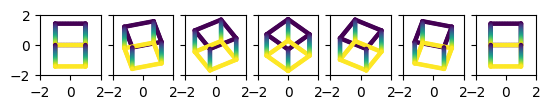

In [93]:
points = np.load("points.npz")["points"]
phis = np.linspace(0, np.pi/2, 7)
fig, axs = plt.subplots(1,7, sharex=True, sharey=True)
for phi, ax in zip(phis, axs.flatten()):
    plot_2d_cube(np.pi/4, phi, points, ax)
fig.show()

In [114]:
# now fix depth perception
def plot_2d_cube_depth(theta, phi, points, ax):
    n1, n2, n3 = polar_basis(theta, phi)
    points_projection = []
    # project points onto phi-theta-plane
    for point in points:
        y = np.dot(point, n2)
        x = np.dot(point, n3)
        # color code z coordinate
        color = point[2]
        # compute depth
        depth = np.dot(point, n1)
        point_projected = [x, y, color, depth]
        points_projection.append(point_projected)
    points_projection = np.array(points_projection)
    # sort points by depth
    points_projection = points_projection[points_projection[:, 3].argsort()]
    ax.set_aspect('equal')
    ax.set_ylim(-2,2)
    ax.set_xlim(-2,2)
    ax.scatter(points_projection[:, 0], points_projection[:, 1], c=points_projection[:,2], s=5, cmap='viridis')
    return points_projection

/var/folders/f5/zmpl7j_93n5bz1wd70hgb4140000gn/T/ipykernel_19594/1560583964.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


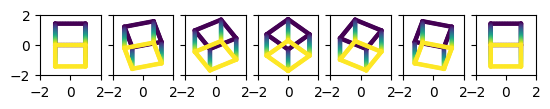

In [115]:
fig, axs = plt.subplots(1,7, sharex=True, sharey=True)
for phi, ax in zip(phis, axs.flatten()):
    plot_2d_cube_depth(np.pi/4, phi, points, ax)
fig.show()